## Part - 1 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

(97, 1) (97, 1)


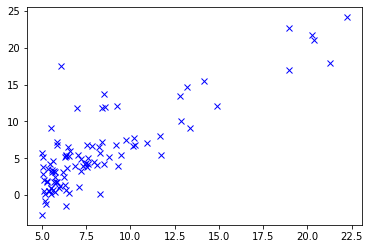

In [2]:
df = pd.read_csv('ex1data1.csv')
X = np.array(df['x'])
X = X.reshape(len(X),1)
Y = np.array(df['y'])
Y = Y.reshape(len(Y),1)

print(X.shape,Y.shape)
plt.plot(X,Y,'bx')

Cost after 0 iterations : 32.072733877455676
Cost after 100 iterations : 4.4771076073762215
Cost after 200 iterations : 4.476971384291363
Cost after 300 iterations : 4.476971375975686
Cost after 400 iterations : 4.476971375975178
Cost after 500 iterations : 4.476971375975178
Cost after 600 iterations : 4.476971375975179
Cost after 700 iterations : 4.476971375975179
Cost after 800 iterations : 4.476971375975179
Cost after 900 iterations : 4.476971375975179
Cost after 1000 iterations : 4.476971375975179


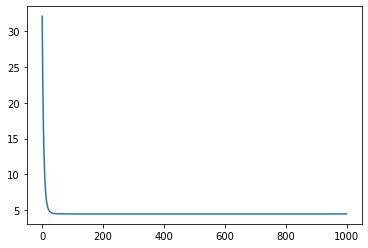

In [3]:
def Linear_reg(X,Y,num_iter = 1000 , lr = 0.3):
    x_para = [np.mean(X) , np.std(X)]
    x = X/x_para[1]
    w = np.zeros((X.shape[0],1))
    b = 0
    m = Y.shape[1]
    J = []
    for i in range(num_iter + 1):
        z = np.dot(w.T,x) + b
        cost = (1/(2*m))*np.sum((z-Y)**2)
        J.append(cost)
        dz = z-Y
        dw = (1/m)*np.dot(dz,x.T)
        db = (1/m)*np.sum(dz)
        w = w - lr*dw
        b = b - lr*db
        if i % 100 == 0 :
            print('Cost after',i,'iterations :',cost)
    
    w = w/x_para[1]
    return w,b,J

w,b,cost = Linear_reg(X.T,Y.T)
plt.plot(range(len(cost)),cost)

w: [[1.19303364]] b: -3.8957808783118515


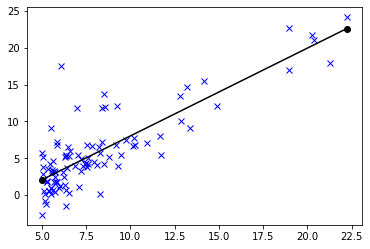

In [4]:
# plotting decision boundary : 
plt.plot(X,Y,'bx')
x = np.array([np.min(X),np.max(X)])
x = x.reshape((x.shape[0],1))
y  =w*x + b
plt.plot(x,y,'k-o')
print('w:',w,'b:',b) # it is more accurate than without normalization since the values converged more quickly 

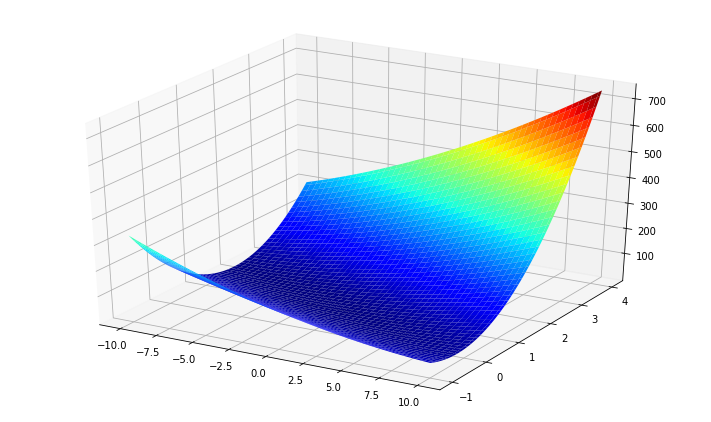

In [5]:
# Visualizing J(w) and its Contours : 
bias = np.linspace(-10, 10, 100).reshape(100,1)
weight = np.linspace(-1, 4, 100).reshape(100,1)
J_vals = np.zeros((len(bias), len(weight)))
for i in range(len(bias)):
    for j in range(len(weight)):
        t = [bias[i], weight[j]];    
        J_vals[i,j] = (1/(2*Y.shape[0]))*np.sum(((X*t[1] + t[0]) - Y)**2)
        
        
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from matplotlib import cm
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.gca(projection='3d')
b,a = np.meshgrid(weight,bias)
ax.plot_surface(a, b, J_vals,cmap = cm.jet)
plt.show()

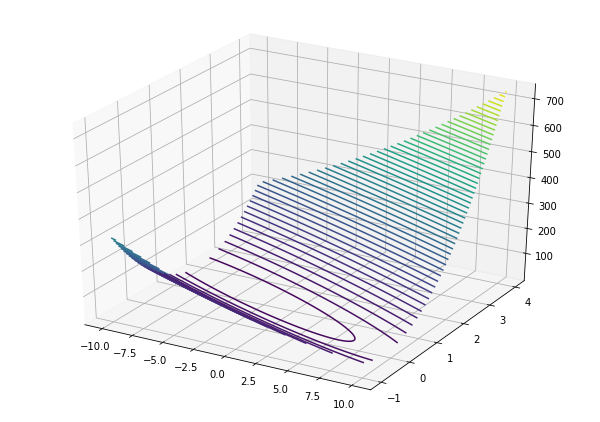

In [6]:
fig = plt.figure()
fig.set_size_inches(10.5, 7.5)
ax = fig.gca(projection='3d')
b,a = np.meshgrid(weight,bias)
ax.contour3D(a,b,J_vals,50)
plt.show()

## Part - 2

(2, 47) (47,)


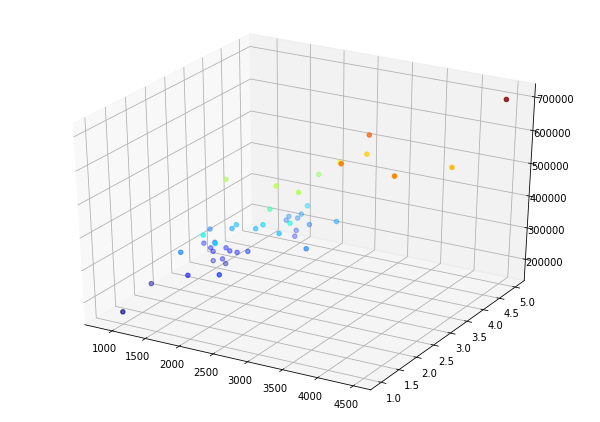

[2104. 1600. 2400. 1416. 3000. 1985. 1534. 1427. 1380. 1494. 1940. 2000.
 1890. 4478. 1268. 2300. 1320. 1236. 2609. 3031. 1767. 1888. 1604. 1962.
 3890. 1100. 1458. 2526. 2200. 2637. 1839. 1000. 2040. 3137. 1811. 1437.
 1239. 2132. 4215. 2162. 1664. 2238. 2567. 1200.  852. 1852. 1203.]


In [112]:
df = pd.read_csv('ex1data2.csv')
x1 = np.array(df['x1'],dtype = float)
x2 = np.array(df['x2'],dtype = float)
X = np.array([x1,x2],dtype = float)
Y = np.array(df['y'],dtype = float)

# since we have 2 features so we will use 3D plot :
print(X.shape,Y.shape)
fig = plt.figure()
fig.set_size_inches(10.5, 7.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1,x2,Y,c=Y, cmap=cm.jet)
plt.show()
Y = Y.reshape((1,Y.shape[0]))

Cost after 0 iterations : 65591548106.45744
Cost after 100 iterations : 2279651834.949386
Cost after 200 iterations : 2155218560.727763
Cost after 300 iterations : 2122888965.1215012
Cost after 400 iterations : 2101826405.7301178
Cost after 500 iterations : 2086429709.427267
Cost after 600 iterations : 2075086438.0788245
Cost after 700 iterations : 2066725312.3539367
Cost after 800 iterations : 2060562132.7008545
Cost after 900 iterations : 2056019101.0410883
Cost after 1000 iterations : 2052670319.9872336


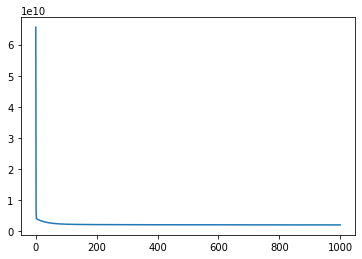

In [91]:
def Linear_reg(X,Y,num_iter = 1000 , lr = 0.03):
    x_para1 = [np.mean(X[0]) , np.std(X[0])]
    x_para2 = [np.mean(X[1]) , np.std(X[1])]
    X[0] = (X[0])/x_para1[1]
    X[1] = (X[1])/x_para2[1]
    
    #print(X)
    w = np.zeros((X.shape[0],1))
    b = 0
    m = Y.shape[1]
    J = []
    for i in range(num_iter + 1):
        z = np.dot(w.T,X) + b
        cost = (1/(2*m))*np.sum((z-Y)**2)
        J.append(cost)
        dz = z-Y
        dw = (1/m)*np.dot(X,dz.T)
        db = (1/m)*np.sum(dz)
        w = w - lr*dw
        b = b - lr*db
        if i % 100 == 0 :
            print('Cost after',i,'iterations :',cost)
    
    w[0] = w[0]/x_para1[1]
    w[1] = w[1]/x_para2[1]
    X[0] = X[0]*x_para1[1]
    X[1] = X[1]*x_para2[1]
    return w,b,J

w,b,cost = Linear_reg(X,Y)
plt.plot(range(len(cost)),cost)

In [77]:
# values due to normalization only i.e. without changing the values back
w = [[109447.79562525][ -6578.35400977]]
b = 340412.6595744678

array([[109447.79562525],
       [ -6578.35400977]])

In [94]:
print(w,b)

[[  139.32910153]
 [-3201.41182226]] 70856.81107693513


In [95]:
# observed output for : price of a 1650 sq-ft, 3 br house  = 293081 (in matlab)
# our prediction :
inpt = np.array([1650,3])
print(np.dot(inpt,w) + b) # hence the outputs are close and valid here!(though the real ouput is 91490 but we worked only with
                          # 2 features so it might be valid due to linear regression .

[291145.59313106]


(2, 47) (47,)


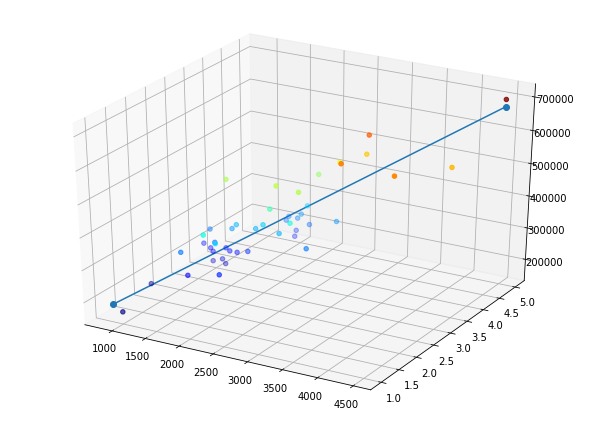

In [124]:
# making fit line in the plot : 
x1 = np.array(df['x1'],dtype = float)
x2 = np.array(df['x2'],dtype = float)
X = np.array([x1,x2],dtype = float)
Y = np.array(df['y'],dtype = float)

# since we have 2 features so we will use 3D plot :
print(X.shape,Y.shape)
fig = plt.figure()
fig.set_size_inches(10.5, 7.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1,x2,Y,c=Y, cmap=cm.jet)
#plt.show()


x1 = np.array([np.min(x1),np.max(x1)])
x2 = np.array([np.min(x2),np.max(x2)])
y = np.array(w[0]*x1 + w[1]*x2 + b)
ax.plot3D(x1,x2,y,'-o')
plt.show()